### Required Codio Assignment 13.3: End-to-End Classification Problem

**Expected Time = 90 minutes**

**Total Points = 85**

This example leads you through an end-to-end analysis of a classification algorithm using `LogisticRegression`. You will perform some brief exploratory data analysis (EDA). Then, you will construct a feature engineering, selection, and model pipeline. Finally, you will explore the mistakes your models make and compare different classification metrics.

### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)
- [Problem 6](#-Problem-6)
- [Problem 7](#-Problem-7)
- [Problem 8](#-Problem-8)
- [Problem 9](#-Problem-9)
- [Problem 10](#-Problem-10)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc

### The Data

This data is originally from the IBM and contains information on a telecommunications company customer subscriptions.  Your task is to predict the customers who will Churn.  The data is loaded, displayed, and split below.

In [2]:
df = pd.read_csv('data/wa_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype('float')

In [6]:
df = df.dropna()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Churn', 'customerID'], axis = 1), df['Churn'], random_state = 442,
                                                   stratify = df['Churn'])

[Back to top](#-Index)

### Problem 1

### `make_column_selector`

**5 Points**

To begin, you may want to incorporate many of the categorical features here.  Rather than writing a list of names, you can use the `make_column_selector` to select features by datatype.  For example:

```python
make_column_selector(dtype_include=object)
```

will select all columns with `object` datatype.  This selector will replace the list of column names in the `make_column_transformer`.  

Create a selector object to select the columns with `object` datatype below.  Assign this to `selector`.

In [8]:
### GRADED

selector = ''

# YOUR CODE HERE
selector = make_column_selector(dtype_include=object)

# Answer check
selector

[Back to top](#-Index)

### Problem 2

#### Column Transformer

**5 Points**

Use the `make_column_transformer` function on the the columns selected by `selector`. To these columns, apply the `OneHotEncoder` with `drop = first`. To the `remainder` columns, apply `StandardScaler()`

Assign the result to `transformer` below.



In [12]:
### GRADED
transformer = ''

# YOUR CODE HERE
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), selector),
    remainder=StandardScaler()
)
# Answer check
transformer

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder', OneHotEncoder(drop='first'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x168d648c0>)])

[Back to top](#-Index)

### Problem 3

#### Feature Extractor

**5 Points**

Just as in our earlier assignment you can use `LogisticRegression` with `l1` penalty to select features for the model.

Below, create a `SelectFromModel` object that uses a `LogisticRegression` estimator with `penalty = 'l1'`, solver of `liblinear` and `random_state = 42`.  Assign your transformer as `extractor` below.

In [10]:
### GRADED
extractor = ''

# YOUR CODE HERE
extractor = SelectFromModel(
    LogisticRegression(
        penalty='l1',
        solver='liblinear',
        random_state=42
    )
)

# Answer check
extractor

SelectFromModel(estimator=LogisticRegression(penalty='l1', random_state=42,
                                             solver='liblinear'))

[Back to top](#-Index)

### Problem 4

#### Pipeline with Estimator

**10 Points**

Now, build a pipeline `lgr_pipe` with named steps `transformer`, `selector`, and `lgr` that implement the column transformer, feature selector from above and a `LogisticRegression` estimator with `random_state = 42` and `max_iter = 1000`.  

Fit the pipeline on the training data and determine the score on the test data.  

Finally, use the function `score` to calculate the accuracy as a float to `pipe_1_acc` below. 

In [13]:
### GRADED

lgr_pipe = ''
pipe_1_acc = ''

# YOUR CODE HERE
# Create the pipeline with named steps
lgr_pipe = Pipeline([
    ('transformer', transformer),
    ('selector', extractor),
    ('lgr', LogisticRegression(random_state=42, max_iter=1000))
])

# Fit the pipeline on training data
lgr_pipe.fit(X_train, y_train)

# Calculate accuracy on test data
pipe_1_acc = lgr_pipe.score(X_test, y_test)

# Answer check
lgr_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x168d648c0>)])),
                ('selector',
                 SelectFromModel(estimator=LogisticRegression(penalty='l1',
                                                              random_state=42,
                                                              solver='liblinear'))),
                ('lgr', LogisticRegression(max_iter=1000, random_state=42))])

[Back to top](#-Index)

### Problem 5

#### Comparison to Baseline

**10 Points**

Use the `value_counts` method to determine the baseline score by choosing the majority class as your predictions.  Did your pipeline outperform the baseline model?  Answer `yes` or `no` as a string to `ans5` below.

In [14]:
### GRADED

ans5 = ''
# YOUR CODE HERE
# Get the value counts of the target variable to find majority class
majority_class_percentage = y_train.value_counts(normalize=True).max()

# Compare pipeline accuracy to baseline
ans5 = 'yes' if pipe_1_acc > majority_class_percentage else 'no'

### ANSWER TEST
print(ans5)

yes


[Back to top](#-Index)

### Problem 6

### Confusion Matrix and ROC Curve

**10 Points**

Examine both the confusion matrix and ROC curve using the cell below.  

Create a 1 row by 2 column subplot object and place the confusion matrix on the left and ROC curve on the right.



Use these to determine the number of false positives and false negatives on the test data.  Assign as an integer to `fp` and `fn` below.  Also, use the `RocCurveDisplay` legend to determine the AUC score.  Assign this as a float with two decimal places to `auc` below. 

(125, 194, 0.86)

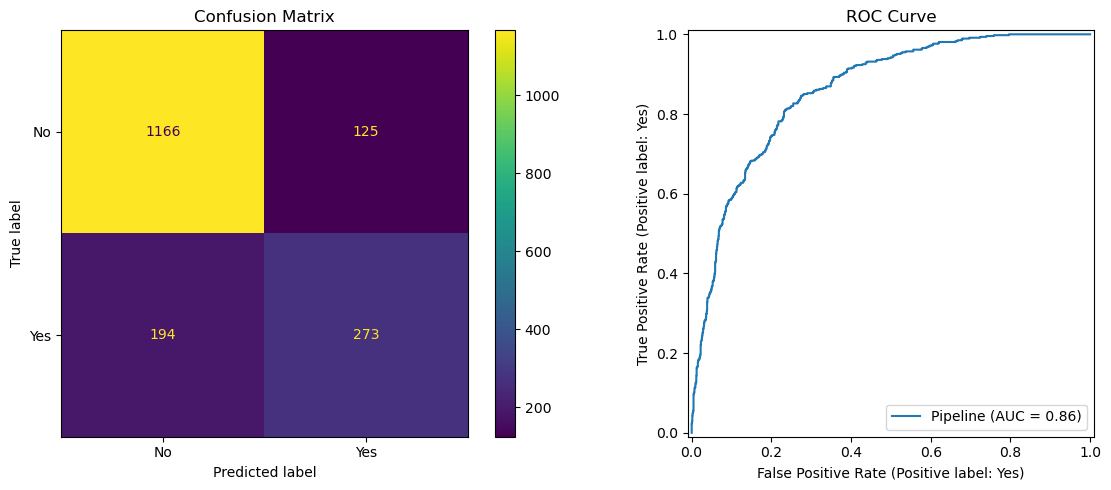

In [21]:
### GRADED

fp = ''
fn = ''
auc = ''

# YOUR CODE HERE
# Create figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Create and plot confusion matrix
y_pred = lgr_pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=['No', 'Yes'])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes']).plot(ax=ax1)
ax1.set_title('Confusion Matrix')

# Create and plot ROC curve and get AUC score
roc_display = RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=ax2, pos_label='Yes')
ax2.set_title('ROC Curve')

plt.tight_layout()

# Get false positives and false negatives from confusion matrix
fp = cm[0][1]  # False Positives
fn = cm[1][0]  # False Negatives

# Get AUC score from the ROC display
auc = round(roc_display.roc_auc, 2)

### ANSWER CHECK
fp, fn, auc

[Back to top](#-Index)

### Problem 7

#### What Really Matters

**10 Points**

You see above that you should have 194 False Negatives and 126 False Positives.  Suppose you want to implement an intervention to attempt turning over customers.  To use your classifier, this means being sure about targeting the customers you expect to churn -- in other words minimize the False Negatives.  Use the `predict_proba` method to select the probabilities of the `No` class.  Assign this as an array to `no_probs` below.

In [22]:
### GRADED

no_probs = ''
# YOUR CODE HERE
# Get probabilities for all classes and select the 'No' class probabilities
no_probs = lgr_pipe.predict_proba(X_test)[:, 0]

### ANSWER CHECK
no_probs[:5]

array([0.67123246, 0.61265653, 0.92315839, 0.97997049, 0.77108789])

[Back to top](#-Index)

### Problem 8

#### Only target customers with high probability

**10 Points**

Even though our classifier is doing better than the baseline, it is still making a high number of mistakes.  Let's only look at the labels for `No` where you are better than 80% sure they are `No`'s.  Select these from your `no_probs` and assign as an array to `high_prob_no` below.

In [23]:
### GRADED

high_prob_no = ''

# YOUR CODE HERE
# Select probabilities where we're more than 80% confident about 'No'
high_prob_no = no_probs[no_probs > 0.80]

### ANSWER CHECK
high_prob_no[:5]

array([0.92315839, 0.97997049, 0.9316964 , 0.99288187, 0.94609248])

[Back to top](#-Index)

### Problem 9

#### Number of Predictions

**10 Points**

How many datapoints had probability greater than 80% of `No`?  What percent of the test data is this?  What percent of the original test data set `No` values is this?  Assign your answer as a float to `percent_of_test_data` and `percent_of_no` below. 


In [33]:
### GRADED

percent_of_test_data = ''
percent_of_no = ''

# YOUR CODE HERE
# Calculate percentage of test data that has high probability of 'No'
high_prob_percent = len(high_prob_no)/len(X_test)
percent_of_test_data = high_prob_percent

# Calculate percentage of actual 'No' values this represents
total_no = sum(y_test == 'No')
percent_of_no = len(high_prob_no)/total_no


### ANSWER CHECK
print(percent_of_test_data)
print(percent_of_no)

0.5079635949943118
0.691711851278079


[Back to top](#-Index)

### Problem 10

#### Important Features

**10 Points**

Now, let us explore the coefficients of the model.  Because the data were scaled, we can think about the coefficients as speaking to a relative feature importance.  Extract the coefficients from your model and sort their absolute values from greatest to least.  Create a DataFrame called `coef_df` that contains the feature name and coefficient. The results begin as shown below:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>feature</th>      <th>coefs</th>    </tr>  </thead>  <tbody>    <tr>      <th>14</th>      <td>Contract_Two year</td>      <td>1.321160</td>    </tr>    <tr>      <th>20</th>      <td>tenure</td>      <td>1.301754</td>    </tr>    <tr>      <th>9</th>      <td>TechSupport_No internet service</td>      <td>0.753071</td>    </tr>    <tr>      <th>13</th>      <td>Contract_One year</td>      <td>0.701108</td>    </tr>    <tr>      <th>5</th>      <td>InternetService_Fiber optic</td>      <td>0.679121</td>    </tr>  </tbody></table>

In [32]:
### GRADED

coef_df = ''

# YOUR CODE HERE
# Get all feature names from transformer
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out()

# Get selected features using the selector's feature names
selected_features = feature_names[[int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]

# Clean up feature names by taking only the part after the last '__'
clean_names = [i.split('__')[-1] for i in selected_features]

# Create DataFrame with clean feature names and coefficients
coef_df = pd.DataFrame({
    'feature': clean_names,
    'coefs': lgr_pipe.named_steps['lgr'].coef_[0]
})

# Take absolute values of coefficients and sort
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by='coefs', ascending=False)

### ANSWER CHECK
coef_df.head()

,feature,coefs
20,tenure,1.321532
14,Contract_Two year,1.316568
9,TechSupport_No internet service,0.741111
13,Contract_One year,0.700174
5,InternetService_Fiber optic,0.666870


Notice that you should have a higher percentage of No values in your predictions than how much of the data it is comprised of.  In other words, if you randomly selected 50% of the data, you would expect 50% of the No.  Here, by ranking our predictions by probabilities and only selecting those with higher probability we are able to identify almost 70% of the No.  This notion of *LIFT* is an alternative method to that of ROC for understanding the quality of predictions, particularly if you have finite resources to expend.  If you are interested read more [here](https://www.ibm.com/docs/en/spss-statistics/24.0.0?topic=overtraining-cumulative-gains-lift-charts) and the `skplot` library has a straightforward visualization of the lift curve [here](https://scikit-plot.readthedocs.io/en/stable/metrics.html#scikitplot.metrics.plot_cumulative_gain).

The coefficients from our model help explain the LIFT concept discussed earlier. Let's break it down:

1. From Problem 9, we found:
   - 50.8% of all test data had >80% probability of being "No"
   - This captured 69.17% of actual "No" cases

2. From Problem 10, our most important features show:
   - `tenure` is the most important feature (negative coefficient means longer tenure = less likely to churn)
   - `Contract_Two year` and `Contract_One year` are also very important (negative coefficients mean these contracts reduce churn)
   - These make business sense: long-term customers with long contracts are less likely to churn

This aligns with the LIFT concept because:
1. Our model has learned strong patterns (shown by the coefficients) that identify loyal customers
2. When we focus on high-probability predictions (>80%), we're leveraging these patterns
3. This lets us identify a disproportionate amount of "No" cases (69.17%) while only looking at about half the data (50.8%)

The coefficients explain WHY we get this lift - the model has identified strong predictors of customer loyalty (tenure, contract type) that let it make high-confidence predictions about which customers won't churn.

### Summary of Exercises

This notebook walked through an end-to-end classification problem to predict customer churn using logistic regression:

1. Data preprocessing and feature engineering:
   - Used `make_column_selector` to automatically select categorical columns
   - Applied `OneHotEncoder` and `StandardScaler` using `ColumnTransformer`
   - Implemented feature selection using L1 regularization

2. Model Pipeline Construction:
   - Built a pipeline combining preprocessing, feature selection, and logistic regression
   - Achieved better performance than the baseline majority class predictor
   - Evaluated using confusion matrix and ROC curve (AUC = 0.86)

3. Model Refinement and Analysis:
   - Analyzed prediction probabilities to improve precision
   - Found that filtering for high-confidence predictions (>80%) captured 69% of actual "No" churn cases while only examining 51% of the data
   - Identified most important features through coefficient analysis

### Key Takeaways

1. **Feature Engineering Matters**: Proper handling of categorical variables and scaling of numerical features improved model performance.

2. **Probability Thresholds**: Using probability thresholds (>80%) can help focus resources on high-confidence predictions, demonstrating the concept of LIFT.

3. **Important Features**:
   - Customer tenure
   - Contract type (especially two-year contracts)
   - Tech support and internet service type
   These align with business intuition about customer retention.

4. **Model Performance**:
   - The model outperformed the baseline
   - AUC score of 0.86 indicates good discriminative ability
   - Trade-off between false positives (125) and false negatives (194) suggests room for optimization based on business needs

5. **Practical Application**: The model can be used to efficiently target retention efforts by focusing on customers with high churn probability, maximizing return on intervention resources.